## In this notebook, We will handle Imbalanced dataset. - By Sahil Chachra

That is, assume there are two classes as output 0 and 1. In given Data set we have 1000 1's and some 100 0's. This data hence is not balanced!

In [ ]:
There are many methods to handle this.
1. Getting more data
2. Under-sampling
3. Over-sampling
4. imbalanced-learn module
5. Random Over-sampling and under-sampling
6. Tomek links
7. SMOTE
8. Over-sampling followed by under-sampling
9. EasyEnsembleClassifier*
10. Balance Cascade*
10. Using Recall to measure accuracy

NOTE - Starred : denotes To be added

We will perform classification using a appropriate algorithm for Data pre-processed using above methods to get performance measurement for each of them!

We will use Credit Card fraud dataset which is highly imbalanced! We will try to use above mentioned methods as data processing method

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We see that there are no missing values. All the columns are normalized except amount column. We will normalize it and then proceed with labels. Also, column time is useless for us. So we will drop it.

In [5]:
data = data.drop(['Time'],axis=1)

In [6]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


So, Time column has been removed!

In [7]:
from sklearn.preprocessing import StandardScaler
temp = data.Amount
temp = temp.values.reshape(-1,1)
data['normAmount'] = StandardScaler().fit_transform(temp)
data = data.drop(['Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Now, Amount has been normalized. We will proceed with Label handling!

In [8]:
label_count = data.Class.value_counts()
print('Class 0 : ', label_count[0])
print('Class 1 : ', label_count[1])

Class 0 :  284315
Class 1 :  492


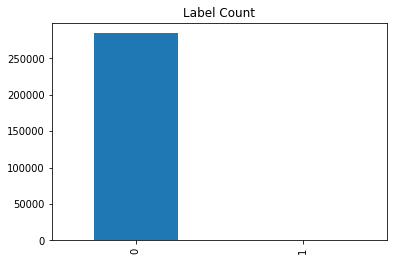

In [9]:
label_count.plot(kind='bar',title='Label Count')

## Random Under-sampling and Random Over-sampling

In [10]:
c_class_0, c_class_1 = data.Class.value_counts()

data_class_0 = data[data['Class']==0]
data_class_1 = data[data['Class']==1]

Random Under-Sampling : In this, the class having more number of records will be reduced randomly and the number of records will be equal to that of target label with less records.

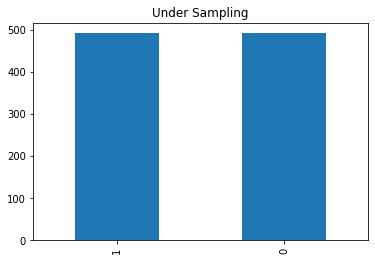

In [11]:
data_class_0_under = data_class_0.sample(c_class_1)
# Here we are reducing the number of records with 0 as label to that of number of records equal to 1
# Pandas sample() is used to randomly select passed number of records 

data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)
#Concatening the data one after the other to create one single dataframe containing all the data

data_test_under.Class.value_counts().plot(kind='bar',title='Under Sampling')

In [12]:
data_test_under.shape

(984, 30)

We see, the amount data has decreased drastically. This might not be a good practice as more the data, better the model! So select the method appropriately!

Random Over-sampling : In this, we increase the number of records for target variable which has very less records compared to other label.

After Random Over-sampling
1    284315
0    284315
Name: Class, dtype: int64


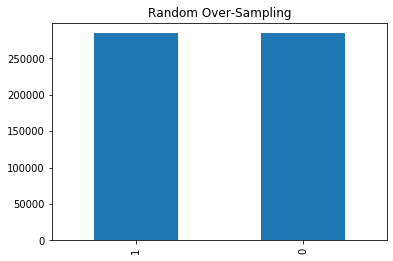

In [13]:
data_class_1_over = data_class_1.sample(c_class_0, replace=True)
# Here we are increasing number of records for label 1 by randomly generating data
data_test_over = pd.concat([data_class_0, data_class_1_over],axis=0)
print("After Random Over-sampling")
print(data_test_over.Class.value_counts())

data_test_over.Class.value_counts().plot(kind='bar',title='Random Over-Sampling')

In [14]:
data_class_1_over.shape

(284315, 30)

Here, new records for 1's were created by slightly changing records having label 1.

## Imbalanced-learn Module

In [15]:
import imblearn

imblearn has many inbuilt techniques to handle Imbalacned dataset even a modified version of Random Forest classifier which handles imbalacned data set and perform Random FOrest Classification. It also includes methods for under sampling, over sampling and even both!

#### Using RandomUnderSampler i.e to reduce 0's records in dataset

In [16]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [18]:
data_X = data.drop('Class',axis=1).values
data_y = data['Class'].values

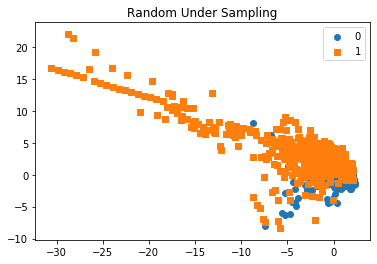

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(data_X, data_y)
plot_2d_space(X_rus, y_rus, 'Random Under Sampling - imblearn')

### Using RandomOverSampler i.e to Increase 1's records in dataset

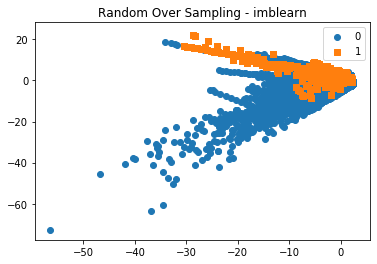

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(data_X, data_y)
plot_2d_space(X_ros, y_ros, 'Random Over Sampling - imblearn')

## Tomek Links

Tomek links remove pairs of 2 labels which have least distance such that we can distinctly see the 2 group of labels. It is a type of under sampling!

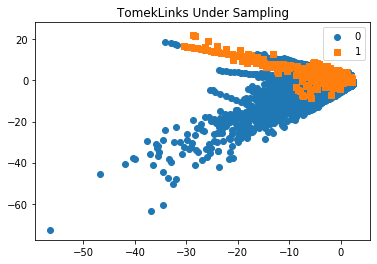

In [31]:
%%time
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(data_X, data_y)

plot_2d_space(X_tl, y_tl, 'TomekLinks Under Sampling')

In [34]:
print(X_tl.shape, data_X.shape)

(284782, 29) (284807, 29)


We see in this case, not much data pairs were removed hence we should not be using it in this case the difference between labels is still too high!
I guess TomekLinks should be used when there is not such a large difference between two class of labels!

## SMOTE

Synthetic Minority Oversampling Technique - what it basically does is for minority class (class with less number of records in dataset), it calculates Nearest Neighbor values of the records selected randomly. It is Over sampling method

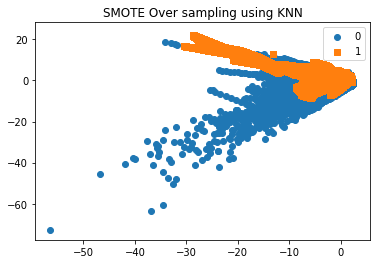

Wall time: 4.88 s


In [37]:
%%time
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(data_X, data_y)
plot_2d_space(X_sm, y_sm, 'SMOTE Over sampling using KNN')

## Over Sampling followed by Under Sampling

First, we will perform over sampling using SMOTE and then remove close pairs ( perform under sampling) using TomekLinks

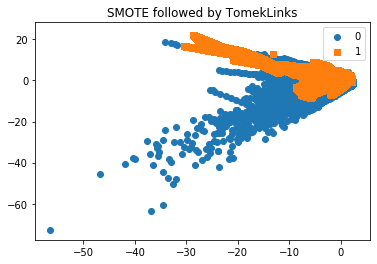

Wall time: 8min 48s


In [38]:
%%time

from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(data_X, data_y)

plot_2d_space(X_smt, y_smt, 'SMOTE followed by TomekLinks')

### To Add - Ensemble sampler (EasyEnsembleClassifier) and BalanceCascade